### Author: Chaitanya Kusurkar

### Topic:- Predict where a pokemon will appear  



In [1]:
import pandas as pd
%pylab inline
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

Populating the interactive namespace from numpy and matplotlib


### Uploading the dataset

In [2]:
df=pd.read_csv("300k.csv")

C:\Users\Sunil Kusurkar\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (20,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Display all the columns and all the rows 

In [3]:
pd.options.display.max_columns = None
display(df)

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,cellId_2920m,cellId_5850m,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,appearedMonth,appearedYear,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,windBearing,pressure,weatherIcon,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,night,5.0,57.0,dummy_day,8.0,8.0,2016.0,14.0,False,Mexico_City,America,Foggy,25.5,4.79,269.0,1018.02,fog,436.0,7.0,16.0,941.0,1181.0,19.0,41.0,-196.0,2431.234100,True,True,True,False,0.049869,True,True,True,True,True,True,0.081776,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.0
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,9.645140e+18,night,5.0,57.0,dummy_day,8.0,8.0,2016.0,14.0,False,Mexico_City,America,Foggy,25.5,4.79,269.0,1018.02,fog,436.0,7.0,16.0,941.0,1181.0,19.0,41.0,-196.0,2431.234100,True,True,True,False,0.259156,False,False,True,True,True,True,0.195622,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False

Cleaning DataSet

Checking null values in dependent variables 

In [4]:
df = df[np.isfinite(df['longitude'])]
df = df[np.isfinite(df['latitude'])]

In [5]:
df.columns

Index([u'pokemonId', u'latitude', u'longitude', u'appearedLocalTime', u'_id',
       u'cellId_90m', u'cellId_180m', u'cellId_370m', u'cellId_730m',
       u'cellId_1460m',
       ...
       u'cooc_143', u'cooc_144', u'cooc_145', u'cooc_146', u'cooc_147',
       u'cooc_148', u'cooc_149', u'cooc_150', u'cooc_151', u'class'],
      dtype='object', length=208)

Deleting the columns which are not required

In [6]:
del df['_id']
del df['appearedLocalTime']
del df['weatherIcon']

del df['cellId_90m']
del df['cellId_180m']
del df['cellId_370m']
del df['cellId_730m']
del df['cellId_1460m']
del df['cellId_2920m']
del df['cellId_5850m']
del df['class']
del df['appearedDay']
del df['appearedMonth']
del df['appearedYear']
del df['appearedDayOfWeek']
del df['city']
del df['terrainType']
del df['gymIn100m']
del df['gymIn250m']
del df['gymIn500m']
del df['gymIn1000m']
del df['gymIn2500m']
del df['gymIn5000m']
del df['pokestopIn100m']
del df['pokestopIn250m']
del df['pokestopIn500m'] 
del df['pokestopIn1000m']
del df['pokestopIn2500m']
del df['pokestopIn5000m']

del df['cooc_1']
del df['cooc_2']
del df['cooc_3']
del df['cooc_4']
del df['cooc_5']
del df['cooc_6']
del df['cooc_7']
del df['cooc_8']
del df['cooc_9']
del df['cooc_10']
del df['cooc_11']
del df['cooc_12']
del df['cooc_13']
del df['cooc_14']
del df['cooc_15']
del df['cooc_16']
del df['cooc_17']
del df['cooc_18']
del df['cooc_19']
del df['cooc_20']
del df['cooc_21']
del df['cooc_22']
del df['cooc_23']
del df['cooc_24']
del df['cooc_25']
del df['cooc_26']
del df['cooc_27']
del df['cooc_28']
del df['cooc_29']
del df['cooc_30']
del df['cooc_31']
del df['cooc_32']
del df['cooc_33']
del df['cooc_34']
del df['cooc_35']
del df['cooc_36']
del df['cooc_37']
del df['cooc_38']
del df['cooc_39']
del df['cooc_40']
del df['cooc_41']
del df['cooc_42']
del df['cooc_43']
del df['cooc_44']
del df['cooc_45']
del df['cooc_46']
del df['cooc_47']
del df['cooc_48']
del df['cooc_49']
del df['cooc_50']
del df['cooc_51']
del df['cooc_52']
del df['cooc_53']
del df['cooc_54']
del df['cooc_55']
del df['cooc_56']
del df['cooc_57']
del df['cooc_58']
del df['cooc_59']
del df['cooc_60']
del df['cooc_61']
del df['cooc_62']
del df['cooc_63']
del df['cooc_64']
del df['cooc_65']
del df['cooc_66']
del df['cooc_67']
del df['cooc_68']
del df['cooc_69']
del df['cooc_70']
del df['cooc_71']
del df['cooc_72']
del df['cooc_73']
del df['cooc_74']
del df['cooc_75']
del df['cooc_76']
del df['cooc_77']
del df['cooc_78']
del df['cooc_79']
del df['cooc_80'] 
del df['cooc_81']
del df['cooc_82']
del df['cooc_83']
del df['cooc_84']
del df['cooc_85']
del df['cooc_86']
del df['cooc_87']
del df['cooc_88']
del df['cooc_89']
del df['cooc_90']
del df['cooc_91']
del df['cooc_92']
del df['cooc_93']
del df['cooc_94']
del df['cooc_95']
del df['cooc_96']
del df['cooc_97']
del df['cooc_98']
del df['cooc_99']
del df['cooc_100']
del df['cooc_101']
del df['cooc_102']
del df['cooc_103']
del df['cooc_104']
del df['cooc_105']
del df['cooc_106']
del df['cooc_107']
del df['cooc_108']
del df['cooc_109']
del df['cooc_110']
del df['cooc_111']
del df['cooc_112']
del df['cooc_113']
del df['cooc_114']
del df['cooc_115']
del df['cooc_116']
del df['cooc_117']
del df['cooc_118']
del df['cooc_119']
del df['cooc_120']
del df['cooc_121']
del df['cooc_122']
del df['cooc_123']
del df['cooc_124']
del df['cooc_125']
del df['cooc_126']
del df['cooc_127']
del df['cooc_128']
del df['cooc_129']
del df['cooc_130']
del df['cooc_131']
del df['cooc_132']
del df['cooc_133']
del df['cooc_134']
del df['cooc_135']
del df['cooc_136']
del df['cooc_137']
del df['cooc_138']
del df['cooc_139']
del df['cooc_140']
del df['cooc_141']
del df['cooc_142']
del df['cooc_143']
del df['cooc_144']
del df['cooc_145']
del df['cooc_146']
del df['cooc_147']
del df['cooc_148']
del df['cooc_149']
del df['cooc_150']
del df['cooc_151']
display(df)

,pokemonId,latitude,longitude,appearedTimeOfDay,appearedHour,appearedMinute,closeToWater,continent,weather,temperature,windSpeed,windBearing,pressure,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,pokestopDistanceKm
0,16,20.525745,-97.460829,night,5.0,57.0,False,America,Foggy,25.5,4.79,269.0,1018.02,436.0,7.0,16.0,941.0,1181.0,19.0,41.0,-196.0,2431.234100,True,True,True,False,0.049869,0.081776
1,133,20.523695,-97.461167,night,5.0,57.0,False,America,Foggy,25.5,4.79,269.0,1018.02,436.0,7.0,16.0,941.0,1181.0,19.0,41.0,-196.0,2431.234100,True,True,True,False,0.259156,0.195622
2,16,38.903590,-77.199780,night,5.0,57.0,False,America,Clear,24.2,4.29,218.0,1015.29,404.0,6.0,44.0,1033.0,1171.0,19.0,31.0,-266.0,761.885600,False,True,True,False,0.489886,0.338602
3,13,47.665903,-122.312561,night,5.0,56.0,True,America,PartlyCloudy,15.6,5.84,160.0,1020.52,398.0,6.0,38.0,858.0,1179.0,19.0,39.0,-77.0,4842.162600,True,True,True,False,0.359309,0.109479
4,133,47.666454,-122.311628,night,5.0,56.0,True,America,PartlyCloudy,15.6,5.84,160.0,1020.52,398.0,6.0,38.0,858.0,1179.0,19.0,39.0,-77.0,4842.162600,True,True,True,False,0.210543,0.040364
5,21,-31.954980,115.853609,night,5.0,55.0,False,Australia,PartlyCloudy,16.5,6.39,218.0,1024.44,385.0,6.0,25.0,330.0,1085.0,18.0,5.0,370.0,2102.977500,True,True,True,False,0.351346,0.011718
6,66,-31.954245,115.852038,night,5.0,55.0,False,Australia,PartlyCloudy,16.5,6.40,218.0,1024.45,385.0,6.0,25.0,330.0,1085.0,18.0,5.0,370.0,2102.977500,True,True,True,False,0.063400,0.040814
7,27,26.235257,-98.197591,night,5.0,55.0,False,America,Clear,28.0,11.26,142.0,1016.69,436.0,7.0,16.0,939.0,1187.0,19.0,47.0,-188.0,849.442260,True,True,True,False,0.818592,0.958176
8,35,20.525554,-97.458800,night,5.0,55.0,False,America,Foggy,25.5,4.79,269.0,1018.02,436.0,7.0,16.0,941.0,1181.0,19.0,41.0,-196.0,2431.234100,True,True,True,False,0.109303,0.116773
9,19,32.928558,-84.340278,night,5.0,54.0,False,America,Clear,23.7,3.94,253.0,1020.12,437.0,7.0,17.0,997.0,1195.0,19.0,55.0,-239.0,86.498360,False,False,False,True,1.986877,1.30086


Performing EDA

Since the dataset is very huge, we split it to two sets for code to run properly

In [7]:
X_train, X_test = train_test_split(df, test_size=.4, random_state=42)

In [8]:
display(X_train) 

,pokemonId,latitude,longitude,appearedTimeOfDay,appearedHour,appearedMinute,closeToWater,continent,weather,temperature,windSpeed,windBearing,pressure,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,pokestopDistanceKm
53953,54,29.934603,-90.061284,evening,19.0,1.0,True,America,Clear,30.6,3.54,34.0,1020.02,401.0,6.0,41.0,492.0,1158.0,19.0,18.0,265.0,1955.863600,True,True,True,False,0.045330,0.069448
187357,96,42.643452,-71.317905,night,20.0,45.0,False,America,Clear,24.2,10.78,76.0,1026.29,375.0,6.0,15.0,541.0,1156.0,19.0,16.0,240.0,1691.790000,True,True,True,False,0.225181,0.041735
46435,19,42.008677,2.285779,night,22.0,6.0,False,Europe,Clear,24.5,1.53,226.0,1015.69,443.0,7.0,23.0,908.0,1217.0,20.0,17.0,-134.0,355.779660,False,False,True,False,0.643477,0.643477
25907,48,39.416425,-77.423176,night,4.0,41.0,False,America,Clear,22.6,9.97,280.0,1016.89,405.0,6.0,45.0,-346.0,1172.0,19.0,32.0,1113.0,849.442260,True,True,True,False,0.301872,0.039712
258794,19,20.565804,-97.443755,afternoon,14.0,30.0,False,America,Overcast,24.9,4.16,287.0,1011.95,435.0,7.0,15.0,28.0,1185.0,19.0,45.0,722.0,2431.234100,True,True,True,False,55.708700,55.7087
131519,19,36.641127,-87.286428,evening,17.0,23.0,False,America,Clear,28.9,10.90,206.0,1022.78,385.0,6.0,25.0,240.0,1152.0,19.0,12.0,527.0,69.585650,False,False,False,True,3.116567,3.116567
41339,13,33.005880,-83.541956,night,23.0,56.0,False,America,Clear,32.2,5.16,143.0,1020.79,433.0,7.0,13.0,644.0,1194.0,19.0,54.0,117.0,7.085878,False,False,False,True,0.851951,0.187691
107023,13,49.119370,-122.665339,night,1.0,22.0,False,America,Clear,14.8,6.58,155.0,1015.67,395.0,6.0,35.0,589.0,1186.0,19.0,46.0,202.0,296.784300,False,False,True,False,0.478494,0.057404
136834,13,39.749604,-84.080203,afternoon,14.0,55.0,False,America,Clear,19.3,3.91,169.0,1024.33,430.0,7.0,10.0,106.0,1202.0,20.0,2.0,666.0,570.040200,False,True,True,False,2.536237,0.01906
236402,118,40.641700,15.802383,night,23.0,49.0,False,Europe,Clear,20.4,7.57,308.0,1016.30,387.0,6.0,27.0,1045.0,1167.0,19.0,27.0,-265.0,396.666200,False,False,True,False,0.356114,0.258155


In [9]:
display(X_test) 

,pokemonId,latitude,longitude,appearedTimeOfDay,appearedHour,appearedMinute,closeToWater,continent,weather,temperature,windSpeed,windBearing,pressure,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,pokestopDistanceKm
211925,19,4.607602,114.329640,morning,11.0,19.0,True,Asia,Clear,27.5,2.36,166.0,1011.73,377.0,6.0,17.0,754.0,1108.0,18.0,28.0,-23.0,0.000000,False,False,False,True,304.137484,1.434641
250920,61,50.712379,-1.993440,evening,17.0,46.0,True,Europe,Clear,17.6,16.56,228.0,1013.45,386.0,6.0,26.0,687.0,1190.0,19.0,50.0,117.0,1886.212200,True,True,True,False,0.159411,0.078687
159047,16,53.613244,-113.387563,morning,8.0,7.0,False,America,Clear,7.5,2.45,96.0,1017.10,411.0,6.0,51.0,-337.0,1214.0,20.0,14.0,1140.0,1055.898200,True,True,True,False,0.592765,0.262352
238916,23,38.883775,-77.043988,night,22.0,55.0,False,America,Clear,26.3,9.99,30.0,1019.21,400.0,6.0,40.0,679.0,1176.0,19.0,36.0,97.0,2810.728500,True,True,True,False,0.276700,0.048947
79251,133,-41.288909,174.774270,morning,11.0,45.0,True,Pacific,Clear,10.0,11.33,1.0,1019.06,398.0,6.0,38.0,981.0,1082.0,18.0,2.0,-297.0,343.109770,False,False,True,False,0.357691,0.004121
81398,13,-37.549438,143.867144,morning,11.0,2.0,False,Australia,Overcast,10.5,4.32,84.0,1029.63,400.0,6.0,40.0,843.0,1088.0,18.0,8.0,-155.0,1055.898200,True,True,True,False,0.509259,0.509259
174974,72,40.718543,-73.997740,night,2.0,44.0,True,America,Clear,23.3,10.00,77.0,1023.56,387.0,6.0,27.0,914.0,1164.0,19.0,24.0,-137.0,7758.250000,True,True,True,False,0.203173,0.026749
268752,19,53.615991,-113.479425,morning,10.0,31.0,False,America,PartlyCloudy,7.9,6.42,268.0,1007.95,408.0,6.0,48.0,-116.0,1220.0,20.0,20.0,928.0,761.885600,False,True,True,False,0.122853,0.079248
165332,48,39.414042,-77.423983,night,6.0,4.0,False,America,Clear,16.1,3.00,330.0,1024.07,403.0,6.0,43.0,-347.0,1175.0,19.0,35.0,1119.0,849.442260,True,True,True,False,0.469112,0.461056
81111,92,51.269259,16.705472,morning,11.0,8.0,False,Europe,PartlyCloudy,16.7,11.30,11.0,1026.64,375.0,6.0,15.0,399.0,1170.0,19.0,30.0,396.0,62.413080,False,False,False,True,0.311360,0.274603


Performing EDA on test dataset

In [10]:
X_test.isnull().any()

pokemonId                 False
latitude                  False
longitude                 False
appearedTimeOfDay         False
appearedHour              False
appearedMinute            False
closeToWater              False
continent                 False
weather                   False
temperature               False
windSpeed                 False
windBearing               False
pressure                  False
sunriseMinutesMidnight    False
sunriseHour               False
sunriseMinute             False
sunriseMinutesSince       False
sunsetMinutesMidnight     False
sunsetHour                False
sunsetMinute              False
sunsetMinutesBefore       False
population_density        False
urban                     False
suburban                  False
midurban                  False
rural                     False
gymDistanceKm             False
pokestopDistanceKm        False
dtype: bool

In [11]:
X_test.pokemonId.value_counts()

16     20890
19     15807
13     10938
21      4900
133     4672
96      4196
41      4060
10      3930
48      3290
129     3089
46      2921
98      1862
23      1659
32      1630
60      1609
54      1593
118     1543
29      1476
43      1472
120     1444
69      1442
35      1407
17      1314
74       967
92       934
116      891
27       804
14       751
102      736
56       731
       ...  
40        13
103       13
5         12
134       11
101       11
136        8
149        8
31         8
113        8
137        7
110        7
71         7
3          7
131        7
62         6
9          6
34         5
76         5
38         5
94         5
26         5
135        5
130        4
65         4
6          3
141        2
45         2
83         1
89         1
139        1
Name: pokemonId, dtype: int64

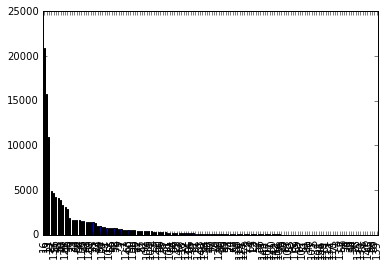

In [12]:
X_test.pokemonId.value_counts().plot(kind='bar')

In [13]:
X_test.latitude.value_counts()

30.043244    47
30.042883    30
48.746411    27
20.527392    25
34.898708    25
53.687444    25
26.230929    24
30.041712    24
26.231396    24
48.743747    23
30.040896    23
26.233883    22
20.526469    22
20.525767    22
44.421358    22
29.936765    21
20.526628    21
20.527098    21
20.527251    21
44.417471    21
26.231406    21
34.897763    21
26.235782    21
20.529611    20
53.688297    20
20.525114    20
33.311286    20
29.937577    20
26.235460    20
44.418155    20
             ..
44.492478     1
26.137995     1
40.026504     1
37.608340     1
43.357698     1
38.819485     1
33.810786     1
40.236322     1
36.853946     1
63.378517     1
38.871523     1
50.105013     1
41.374591     1
43.039247     1
32.675221     1
39.129292     1
53.793765     1
53.792545     1
25.219438     1
33.673001     1
34.095660     1
35.987986     1
38.478569     1
42.359222     1
39.757332     1
38.994892     1
39.424178     1
39.799703     1
36.816400     1
43.709948     1
Name: latitude, dtype: i

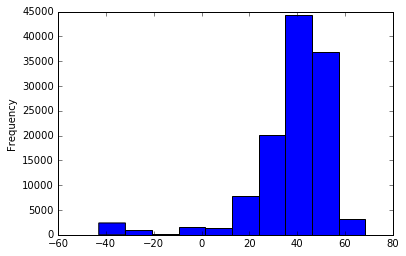

In [14]:
X_test.latitude.plot(kind='hist')

In [15]:
X_test.longitude.value_counts()

-97.461167     98
-98.195797     73
-77.527412     67
-97.458293     65
-97.460237     63
 110.333348    62
-98.197591     56
-97.460829     55
-98.197249     54
-98.196224     53
-98.197677     52
-97.458800     52
-97.461844     49
-77.530010     48
-97.460153     47
-97.461421     46
-99.605387     46
 110.335210    46
-112.053459    44
-112.054390    43
-77.526785     43
-77.528577     42
-112.052993    42
-77.528935     41
-97.460491     40
-112.054577    40
-97.448657     40
-97.460406     40
-97.459646     40
-97.458209     39
               ..
 116.075512     1
-119.226948     1
 4.880347       1
-105.007756     1
-93.277459      1
 2.393023       1
-104.966950     1
-85.335064      1
-122.744296     1
 144.963206     1
 2.344133       1
-113.530374     1
 25.286557      1
 14.501799      1
-90.350163      1
-122.498345     1
 10.940151      1
-84.044538      1
-119.699300     1
-86.811874      1
 6.797660       1
 11.337641      1
-84.102400      1
 14.417021      1
 10.504347

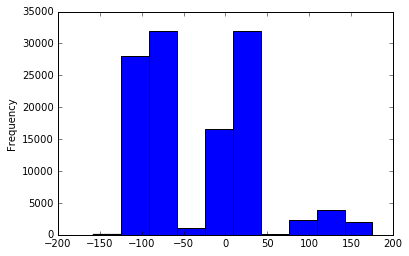

In [16]:
X_test.longitude.plot(kind='hist')

In [17]:
X_test.appearedTimeOfDay.value_counts()

night        59260
morning      24001
afternoon    18335
evening      16813
Name: appearedTimeOfDay, dtype: int64

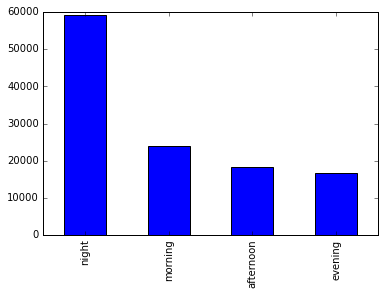

In [18]:
X_test.appearedTimeOfDay.value_counts().plot(kind='bar')

In [19]:
X_test.appearedHour.value_counts() 

4.0     6716
0.0     6266
23.0    6012
1.0     5896
5.0     5894
3.0     5635
13.0    5480
10.0    5311
6.0     4997
11.0    4940
14.0    4820
2.0     4816
8.0     4738
20.0    4690
7.0     4565
19.0    4507
9.0     4447
16.0    4412
15.0    4377
18.0    4257
21.0    4199
22.0    4139
12.0    3658
17.0    3637
Name: appearedHour, dtype: int64

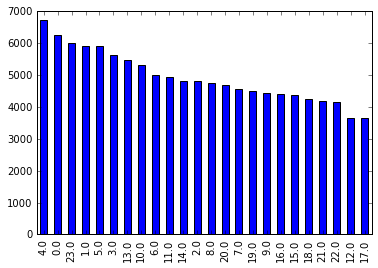

In [20]:
X_test.appearedHour.value_counts().plot(kind='bar')

In [21]:
X_test.appearedMinute.value_counts() 

49.0    2232
4.0     2208
42.0    2159
17.0    2149
58.0    2132
14.0    2105
59.0    2083
56.0    2080
51.0    2075
44.0    2072
55.0    2064
50.0    2063
54.0    2059
45.0    2039
18.0    2039
20.0    2037
37.0    2033
48.0    2028
52.0    2021
53.0    2021
46.0    2020
38.0    2016
9.0     2005
22.0    2002
16.0    2001
3.0     1995
43.0    1993
19.0    1989
13.0    1986
47.0    1982
29.0    1981
6.0     1980
24.0    1973
57.0    1970
11.0    1946
27.0    1941
1.0     1939
10.0    1937
35.0    1927
32.0    1921
39.0    1918
15.0    1913
8.0     1902
34.0    1902
7.0     1901
12.0    1899
28.0    1897
0.0     1885
26.0    1879
21.0    1878
23.0    1874
2.0     1868
40.0    1841
5.0     1830
25.0    1825
33.0    1818
31.0    1818
30.0    1807
41.0    1807
36.0    1744
Name: appearedMinute, dtype: int64

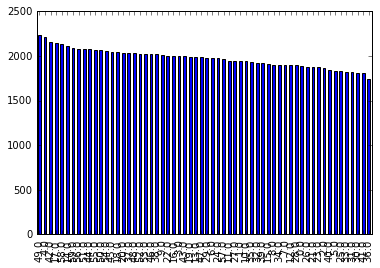

In [22]:
X_test.appearedMinute.value_counts().plot(kind='bar')

In [23]:
X_test.closeToWater.value_counts() 

False    90875
True     27534
Name: closeToWater, dtype: int64

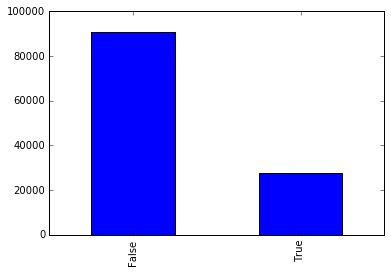

In [24]:
X_test.closeToWater.value_counts().plot(kind='bar')

In [25]:
X_test.continent.value_counts()

America              60107
Europe               48823
Asia                  6388
Australia             1363
Pacific                793
America/Indiana        441
America/Argentina      438
Africa                  40
Atlantic                14
Indian                   1
America/Kentucky         1
Name: continent, dtype: int64

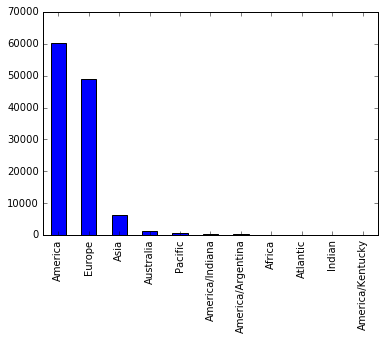

In [26]:
X_test.continent.value_counts().plot(kind='bar')

In [27]:
X_test.weather.value_counts()

Clear                    67965
PartlyCloudy             19332
MostlyCloudy             18847
Overcast                  5751
Drizzle                   1754
LightRain                 1717
Rain                       547
Foggy                      523
Breezy                     424
Dry                        371
Humid                      235
BreezyandPartlyCloudy      209
HeavyRain                  146
HumidandOvercast           126
BreezyandOvercast           94
Windy                       81
DrizzleandBreezy            72
WindyandFoggy               37
LightRainandBreezy          36
DryandPartlyCloudy          35
DangerouslyWindy            35
BreezyandMostlyCloudy       26
DryandMostlyCloudy          24
RainandWindy                17
HumidandPartlyCloudy         4
WindyandPartlyCloudy         1
Name: weather, dtype: int64

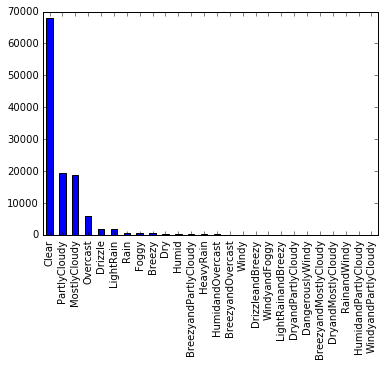

In [28]:
X_test.weather.value_counts().plot(kind='bar')

In [29]:
X_test.urban.value_counts()

False    67694
True     50715
Name: urban, dtype: int64

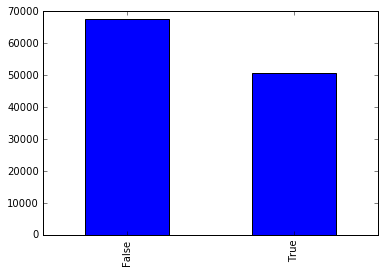

In [30]:
X_test.urban.value_counts().plot(kind='bar')

In [31]:
X_test.suburban.value_counts()

True     72293
False    46116
Name: suburban, dtype: int64

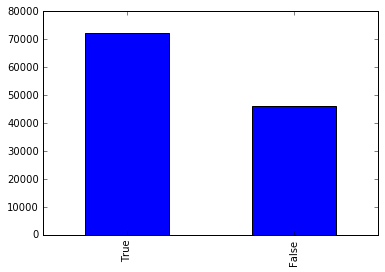

In [32]:
X_test.suburban.value_counts().plot(kind='bar')

In [33]:
X_test.midurban.value_counts()

True     83887
False    34522
Name: midurban, dtype: int64

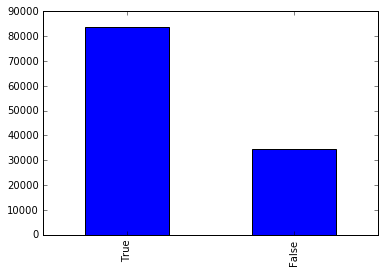

In [34]:
X_test.midurban.value_counts().plot(kind='bar')

In [35]:
X_test.rural.value_counts()

False    83887
True     34522
Name: rural, dtype: int64

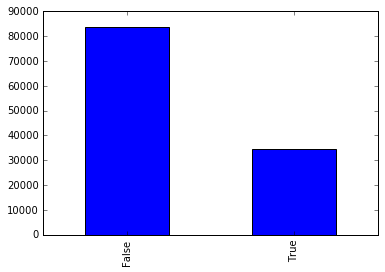

In [36]:
X_test.rural.value_counts().plot(kind='bar')

Exporting train and test dataset to csv

In [37]:
X_test.to_csv('final_test.csv')

In [38]:
X_train.to_csv('final_train.csv')